In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Загружаем датасет диабета
diabetes = datasets.load_diabetes()

# Преобразуем в DataFrame для удобства
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [22]:
# Выбираем признак BMI
X = df[['bmi']].values
y = df['target'].values

# Разделим на обучающую и тестовую выборки
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [23]:
# Создаем модель
model = linear_model.LinearRegression()

# Обучаем модель
model.fit(X_train, y_train)

# Делаем предсказания
y_pred = model.predict(X_test)

# Вывод коэффициентов
print("Коэффициент (наклон):", model.coef_[0])
print("Свободный член (сдвиг):", model.intercept_)

Коэффициент (наклон): 938.2378612513521
Свободный член (сдвиг): 152.91886182616113


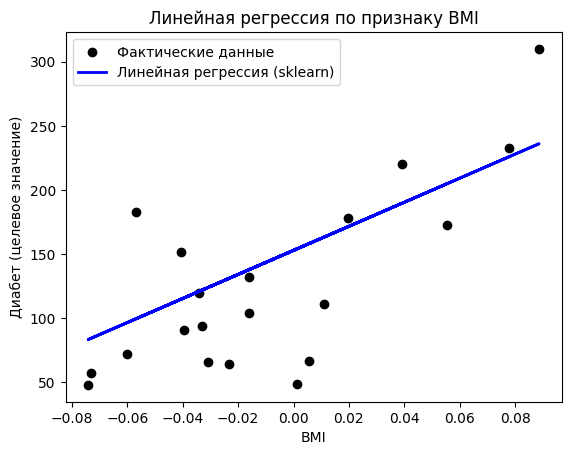

In [24]:
plt.scatter(X_test, y_test, color='black', label='Фактические данные')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Линейная регрессия (sklearn)')
plt.xlabel('BMI')
plt.ylabel('Диабет (целевое значение)')
plt.title('Линейная регрессия по признаку BMI')
plt.legend()
plt.show()

In [25]:
# Метод наименьших квадратов
x_mean = X_train.mean()
y_mean = y_train.mean()

# Вычисление коэффициентов вручную
numerator = np.sum((X_train - x_mean) * (y_train.reshape(-1, 1) - y_mean))
denominator = np.sum((X_train - x_mean)**2)
b1 = numerator / denominator
b0 = y_mean - b1 * x_mean

print("Ручной расчёт:")
print("Коэффициент (наклон):", b1) 
print("Свободный член:", b0)


Ручной расчёт:
Коэффициент (наклон): 938.2378612513517
Свободный член: 152.91886182616113


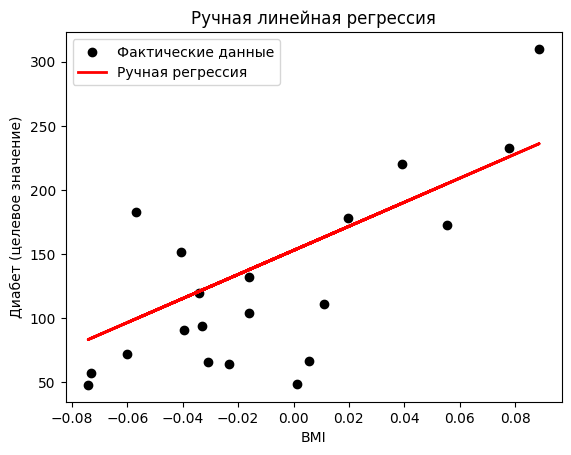

In [26]:
# Предсказания вручную
y_pred_manual = b0 + b1 * X_test

plt.scatter(X_test, y_test, color='black', label='Фактические данные')
plt.plot(X_test, y_pred_manual, color='red', linewidth=2, label='Ручная регрессия')
plt.xlabel('BMI')
plt.ylabel('Диабет (целевое значение)')
plt.title('Ручная линейная регрессия')
plt.legend()
plt.show()

In [27]:
results = pd.DataFrame({
    'BMI': X_test.flatten(),
    'Actual': y_test,
    'Predicted (sklearn)': y_pred,
    'Predicted (manual)': y_pred_manual.flatten()
})

results.head(10)  # Первые 10 строк

,BMI,Actual,Predicted (sklearn),Predicted (manual)
0,0.077863,233.0,225.973240,225.973240
1,-0.039618,91.0,115.747634,115.747634
2,0.011039,111.0,163.276106,163.276106
3,-0.040696,152.0,114.736390,114.736390
4,-0.034229,120.0,120.803854,120.803854
5,0.005650,67.0,158.219886,158.219886
6,0.088642,310.0,236.085681,236.085681
7,-0.033151,94.0,121.815098,121.815098
8,-0.056863,183.0,99.567728,99.567728
9,-0.030996,66.0,123.837587,123.837587
